In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = r"C:\Users\ksham\Downloads\Admission_Predict.csv"
admit = pd.read_csv(filepath,encoding='utf-8')

In [3]:
admit

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
admit.shape

(400, 9)

In [5]:
admit.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
admit.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
admit.drop(columns='Serial No.')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [12]:
admit['Chance of Admit '] = [1 if each > 0.75 else 0 for each in admit['Chance of Admit ']]
admit

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [13]:
x = admit[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = admit['Chance of Admit ']

In [14]:
admit.rename(columns={'Chance of Admit ': 'Admitted'}, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (300, 7)
y_train (300,)
y_train (100, 7)
y_test (100,)


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [20]:
x_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1
367,311,98,1,1.0,2.5,7.46,0
179,307,102,3,3.0,3.0,8.27,0
27,298,98,2,1.5,2.5,7.50,1
89,316,109,4,4.5,3.5,8.76,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [21]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
300,309,106,2,2.5,2.5,8.00,0
277,320,101,2,2.5,3.0,8.62,0
289,313,109,3,4.0,3.5,9.00,0
260,327,108,5,5.0,3.5,9.13,1


In [22]:
y_train

82     1
367    0
179    0
27     0
89     0
      ..
255    1
72     1
396    1
235    1
37     0
Name: Chance of Admit , Length: 300, dtype: int64

In [23]:
y_test

398    0
125    0
328    1
339    1
172    1
      ..
300    0
277    0
289    1
260    1
173    1
Name: Chance of Admit , Length: 100, dtype: int64

In [24]:
x=admit.iloc[:,:-1]
y=admit.iloc[:,:-1]

In [25]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [26]:
y

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [27]:
x.fillna({'GRE Score':admit['GRE Score'].mean(),'TOEFL Score':admit['TOEFL Score'].mean(),
          'University Rating':admit['University Rating'].mean(), 'SOP':admit['SOP'].mean(),
          'LOR ':admit['LOR '].mean(), 'CGPA':admit['CGPA'].mean()},inplace=True)

In [28]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [45]:
from sklearn import tree
clas = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clas.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [46]:
y_test_predict=clas.predict(x_test)
y_test_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [47]:
y_train_predict=clas.predict(x_train)
y_train_predict

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], d

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [49]:
test_accuracy=accuracy_score(y_test,y_test_predict)
print("Test accuracy= ",test_accuracy)
confusion_matrix(y_test,y_test_predict)

Test accuracy=  0.88


array([[52,  4],
       [ 8, 36]], dtype=int64)

In [50]:
train_accuracy=accuracy_score(y_train,y_train_predict)
print("Train accuracy= ",train_accuracy)
confusion_matrix(y_train,y_train_predict)

Train accuracy=  0.8866666666666667


array([[157,  15],
       [ 19, 109]], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[5] <= 8.74\ngini = 0.489\nsamples = 300\nvalue = [172, 128]'),
 Text(0.25, 0.5, 'x[1] <= 108.5\ngini = 0.193\nsamples = 176\nvalue = [157, 19]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.123\nsamples = 152\nvalue = [142, 10]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.469\nsamples = 24\nvalue = [15, 9]'),
 Text(0.75, 0.5, 'x[0] <= 319.5\ngini = 0.213\nsamples = 124\nvalue = [15, 109]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 105\nvalue = [6, 99]')]

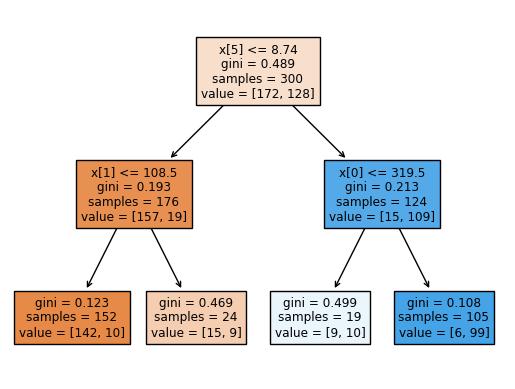

In [58]:
tree.plot_tree(clas,max_depth=2,filled=True)

In [43]:
Features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

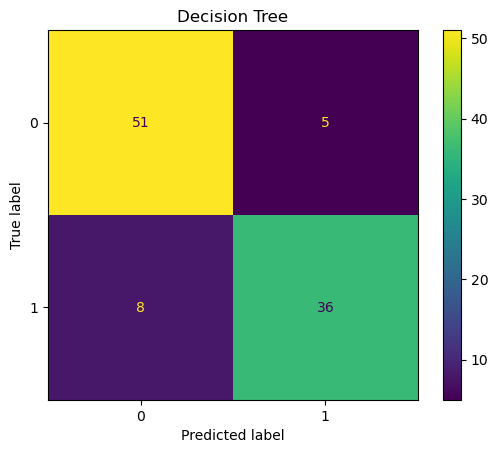

 Accuracy is 0.87
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.88      0.82      0.85        44

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.87       100
weighted avg       0.87      0.87      0.87       100



In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_test_predict)}")
print(classification_report(y_test,y_test_predict))

In [52]:
clas = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
clas.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [53]:
y_test_predict=clas.predict(x_test)
y_test_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [54]:
y_train_predict=clas.predict(x_train)
y_train_predict

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], d

In [55]:
test_accuracy=accuracy_score(y_test,y_test_predict)
print("Test accuracy= ",test_accuracy)
confusion_matrix(y_test,y_test_predict)

Test accuracy=  0.88


array([[52,  4],
       [ 8, 36]], dtype=int64)

In [56]:
train_accuracy=accuracy_score(y_train,y_train_predict)
print("Train accuracy= ",train_accuracy)
confusion_matrix(y_train,y_train_predict)

Train accuracy=  0.8866666666666667


array([[157,  15],
       [ 19, 109]], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[5] <= 8.74\ngini = 0.489\nsamples = 300\nvalue = [172, 128]'),
 Text(0.25, 0.5, 'x[1] <= 108.5\ngini = 0.193\nsamples = 176\nvalue = [157, 19]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.123\nsamples = 152\nvalue = [142, 10]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.469\nsamples = 24\nvalue = [15, 9]'),
 Text(0.75, 0.5, 'x[0] <= 319.5\ngini = 0.213\nsamples = 124\nvalue = [15, 109]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 105\nvalue = [6, 99]')]

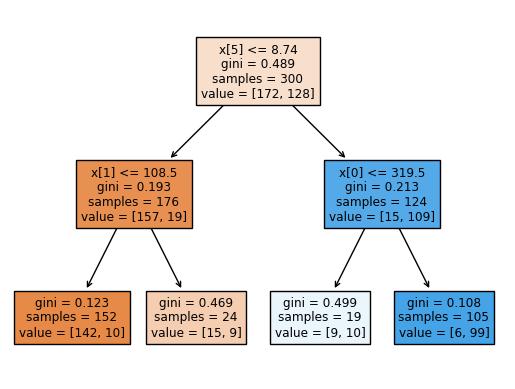

In [59]:
tree.plot_tree(clas,max_depth=2,filled=True)

In [60]:
Features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

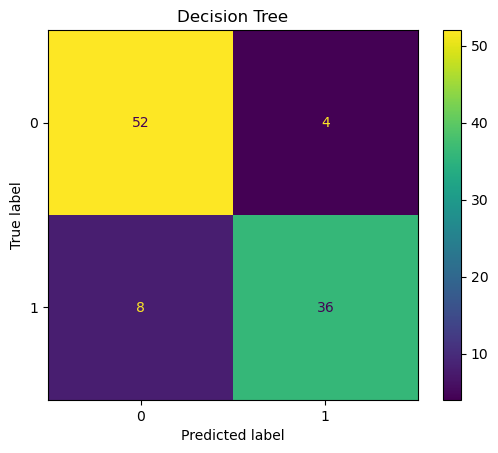

 Accuracy is 0.88
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.90      0.82      0.86        44

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100



In [61]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict)
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_test_predict)}")
print(classification_report(y_test,y_test_predict))